# Data Exploration

This notebook is the next step after scrapping posts and comments from the subreddit r/AITA https://github.com/Nico404/scrap_reddit

### 1. Imports & reading data

In [105]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from src.count_occurrences import count_occurrences
from src.count_first_keys import count_first_keys

In [55]:
posts = pd.read_csv("data/posts_v4.csv",
        names=["post_id", "num_comments", "post_content", "post_title", "post_url"])

In [56]:
comments = pd.read_csv("data/comments_v4.csv",
           names=["comment_id", "post_id", "comment_score", "comment_content", "comment_permalink"])

### 2. First glimps

In [25]:
posts.head()


,post_id,num_comments,post_content,post_title,post_url
0,10uxee0,1181,"I know this post sounds super petty, but this ...",AITA for telling my boyfriend I'll shave my le...,https://www.reddit.com/r/AmItheAsshole/comment...
1,10ur722,1849,My daughter Bryn F9 is going on a trip to a ne...,AITA for pulling my daughter from a waterpark ...,https://www.reddit.com/r/AmItheAsshole/comment...
2,10upxdd,1180,Alright so my son (17) has weekly therapy appo...,AITA for not letting an elderly woman have my ...,https://www.reddit.com/r/AmItheAsshole/comment...
3,10v2vra,131,We live three blocks away from my parents and ...,AITA for taking my kids to my parents house to...,https://www.reddit.com/r/AmItheAsshole/comment...
4,10ung90,1513,My daughter (16) and I have gotten into a mass...,AITA for calling my daughter a selfish insecur...,https://www.reddit.com/r/AmItheAsshole/comment...


In [91]:
comments.head()

,comment_id,post_id,comment_score,comment_content,comment_permalink
0,j7dy9fw,t3_10qxvu1,7,The post about the bratty daughter and the seafood restaurant is rife with commenters creating mental disorders for the daughter to scrub accountability for her behaviour. Honestly kinda dangerous,/r/AmItheAsshole/comments/10qxvu1/aita_monthly_open_forum_february_2023_trolls/j7dy9fw/
1,j7ctunm,t3_10qxvu1,7,My subconscious chose the wrong option for a report I feel so embarrassed even though I don’t think it’s a big deal 🥲 Just wanted to say that somewhere,/r/AmItheAsshole/comments/10qxvu1/aita_monthly_open_forum_february_2023_trolls/j7ctunm/
2,j7cs0v5,t3_10qxvu1,2,"Unpopular opinion: I think contest mode is bad, mainly because of the fact that I can't see my own score. I never liked the whole closing your eyes when people vote thing (which I assume this is based on). Worse, if a post gets removed, you won't ever be able to see your score, even after 1.5 hours, so you're stuck seeing ""score hidden"" forever. I think you should add the feature in which after a post is deleted or removed that contest mode gets disabled.",/r/AmItheAsshole/comments/10qxvu1/aita_monthly_open_forum_february_2023_trolls/j7cs0v5/
3,j7c39c8,t3_10qxvu1,0,can we talk about the ableism on this sub. example the post about op not bringing his kids to his sisters wedding because his sister didn't allow his youngest daughter to come to the wedding. that is the the worst and most toxic comment section i have seen in this sub. the comments acted like op was the devil and ops daughter will always be mad at him and his youngest daughter. people also called the ops youngest daughter golden child and ops oldest daughters life will be hell because of op caring about the youngest daughter who has autism people also said that op taught his oldest daughter that she will be punished because of the youngest sisters autism . there were so many abelist things said in that comment section. like tf fuck was op yta. the real asshole was ops sister who purposely excluded ops daughter. op was nta.,/r/AmItheAsshole/comments/10qxvu1/aita_monthly_open_forum_february_2023_trolls/j7c39c8/
4,j7b8sl3,t3_10qxvu1,25,"I hate when commenters just make stuff up about the post and then move forward acting as if it's true. Like the post on the front page about the grandmother giving her granddaughter braids. People saying the mom was a racist and not taking care of her daughter's hair and ruining it etc. The OP clearly stated the granddaughter had beautiful, well maintained curls. It's like they have to make up something to be mad at.",/r/AmItheAsshole/comments/10qxvu1/aita_monthly_open_forum_february_2023_trolls/j7b8sl3/


In [32]:
print("(rows,columns) in posts & comments dataframe:", posts.shape, comments.shape)

(rows,columns) in posts & comments dataframe: (1072, 5) (23601, 5)


In [34]:
posts.dtypes, comments.dtypes


(post_id         object
 num_comments     int64
 post_content    object
 post_title      object
 post_url        object
 dtype: object,
 comment_id           object
 post_id              object
 comment_score         int64
 comment_content      object
 comment_permalink    object
 dtype: object)

In [49]:
posts.describe()

,num_comments
count,1072.000000
mean,125.367537
std,461.041357
min,1.000000
25%,14.000000
50%,25.000000
75%,52.250000
max,6918.000000


In [50]:
 comments.describe()

,comment_score
count,23601.000000
mean,82.151095
std,922.981101
min,-81.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,46045.000000


### 3. Data cleaning

In [77]:
pd.set_option("display.max_colwidth", 10000)  # limit size of column display
posts["post_content"].sample(1)
# pretty clean besides sparse \r, &amp;#x200B;,  &amp; which shouldn't be a problem overall

219    A bit of context: wife is busy trying to advance her career, I have been nothing but supportive because I believe in her and she deserves to see her dreams come true. I take care of a large chunk of things at home (all the cooking, dishes, cleaning, chores, errands). I also help with work-related things, since we are in similar fields. There is one thing where I do not have acting power: when I moved in with her, she did not want to modify the lease so I am not officially on it, and I never had any contact with the landlady. My wife rented here for 13 years, and she always deals with the owner (who is a very nice, kind and polite person who takes care of the property when needs arise). However, she does not want to "disturb" the landlady when house maintenance is needed. Case in point, there is a leak from the upstairs bathroom (above the dining room) that has been going on for two years now: the upper part of a wall is bulging, and in the past months it got worse as water occas

In [86]:
comments["comment_content"].sample(10)
# 
# pretty clean besides sparse &gt;, &amp; which shouldn't be a problem overall

8563                                                                                                                                                                                                                                                                                                                                                                          By the sounds of it your mom is a piece of work and you are NTA, but I will also say: $300/week in child support with multiple kids is *nothing,* especially when those kids are teens. Teens are pricey. She was probably spending that in food costs alone.
11320                                                                                                                                                                                                                                                        Wow…I could never work with some people.   Pete is definitely TA. If he had a sense of humor at all, he would have started eati

###### Reformat post_id from comments to match post_id from posts

In [57]:
comments["post_id"] = comments["post_id"].str[3:]  # t3 id reformat

In [98]:
comments["post_id"].head()

0    10qxvu1
1    10qxvu1
2    10qxvu1
3    10qxvu1
4    10qxvu1
Name: post_id, dtype: object

###### Keeping only columns we need

In [108]:
posts.columns, comments.columns

(Index(['post_id', 'post_content', 'post_title'], dtype='object'),
 Index(['comment_id', 'post_id', 'comment_score', 'comment_content',
        'comment_permalink'],
       dtype='object'))

In [59]:
posts = posts[['post_id',
               #'num_comments', 
               'post_content', 
               'post_title', 
               #'post_url'
              ]].copy()

In [112]:
posts.head()

,post_id,post_content,post_title
0,10uxee0,"I know this post sounds super petty, but this is the most ridiculous fight I've had with my boyfriend, and unfortunately it's where we're at.I \[F28\] have never shaved in my life. I think it's up to the person regardless, but I've also just never really had a lot of hair. My boyfriend recently stayed over and asked to borrow a razor. Since I don't shave, I didn't have one on hand, and apparently that grossed him out. He told me that it was unhygienic to not shave and we argued back and forth about the issue when I finally told him that I'd only start shaving my legs if he shaved his first. He called me immature and petty, whereas I think he's being super fixated on this weird thing. It honestly wouldn't really bother me to shave, but I'm just more irked at his statements where he basically called me dirty. I was serious though: I'll shave whenever he shaves too.We're at an impasse but I wonder if I *am* being a little too petty about the whole thing.",AITA for telling my boyfriend I'll shave my legs if he shaves his?
1,10ur722,"My daughter Bryn F9 is going on a trip to a nearby water park with her class next week. She loves water and has been talking about it for months, so I was a bit thrown off when she came home crying a few days ago and told me she didn’t want to go. I asked her why and she wouldn't tell me because she thought I’d think she’s a “bad person.” When I finally coaxed it out of her, she said her teacher “Ms. N” has forced her to be the “buddy” of her classmate “Ben” for the entirety of the trip. She was to ride the bus with Ben to and from the trip, eat lunch with him, and go on all the rides with him instead of spending time with her friends. She then said nobody likes Ben because he whines whenever they have to do work and picks his nose and wipes boogers everywhere.I was horrified, not only because Ms. N had made Bryn do such a thing, but also because she had made her believe she was a bad person for not wanting to. Unfortunately this wasn’t my first experience with Ms. N, as she frequently used my soft-spoken, intelligent older daughter as a “behavior buffer” for the naughty boys until I threatened to report her to the superintendent. It’s clear to me that Ms. N is still too comfortable with enforcing archaic gender roles on her kids and forcing girls to do unpaid emotional labor for the sake of the boys. I immediately sent Ms. N an email condemning her actions. She sent me back an email with a bunch of bs that basically ended with “if Bryn goes on the trip, she has to be Ben’s buddy.” *Fine.* I informed her Bryn would not be attending then. I immediately booked VIP tickets the same day her class was going so she could still go to the park and see her friends.What happened next I wasn’t expecting. Bryn is quite popular, so I have gotten to know a lot of the moms in her class. When I let them know what Ms. N did, some of them were so horrified that they also pulled their kids out of the trip. In total, eight kids (out of a class of twenty) are either not going, or going with us. Today I got an email from Ms. N saying that because almost half of the class isn’t going, they either have to raise the cost for the other students or not go at all. She practically begged me to let Bryn go and tell all the other parents to let their kids go, promising she wouldn’t make Bryn do anything she didn’t want to do. I told her she should have thought about that before she tried to make my daughter do *her* job. My husband said I was being a bit petty and that Ms. N clearly feels bad about what she did, and I should let Bryn go as I’ve already gotten my way. He asked me if I really wanted to deprive children of what they’ve been waiting for all year. The thing is, if this wasn’t Ms. N’s first offense I probably would have agreed, but she has a pattern of this type of behavior and hopefully this will put a stop to it. Plus, if she has to explain this to her superiors, I have receip

In [58]:
comments  = comments[[#'comment_id',
                      'post_id',
                      'comment_score',
                      'comment_content',
                      #'comment_permalink'
                     ]].copy()


In [115]:
comments.head()

,post_id,comment_score,comment_content
0,10qxvu1,7,The post about the bratty daughter and the seafood restaurant is rife with commenters creating mental disorders for the daughter to scrub accountability for her behaviour. Honestly kinda dangerous
1,10qxvu1,7,My subconscious chose the wrong option for a report I feel so embarrassed even though I don’t think it’s a big deal 🥲 Just wanted to say that somewhere
2,10qxvu1,2,"Unpopular opinion: I think contest mode is bad, mainly because of the fact that I can't see my own score. I never liked the whole closing your eyes when people vote thing (which I assume this is based on). Worse, if a post gets removed, you won't ever be able to see your score, even after 1.5 hours, so you're stuck seeing ""score hidden"" forever. I think you should add the feature in which after a post is deleted or removed that contest mode gets disabled."
3,10qxvu1,0,can we talk about the ableism on this sub. example the post about op not bringing his kids to his sisters wedding because his sister didn't allow his youngest daughter to come to the wedding. that is the the worst and most toxic comment section i have seen in this sub. the comments acted like op was the devil and ops daughter will always be mad at him and his youngest daughter. people also called the ops youngest daughter golden child and ops oldest daughters life will be hell because of op caring about the youngest daughter who has autism people also said that op taught his oldest daughter that she will be punished because of the youngest sisters autism . there were so many abelist things said in that comment section. like tf fuck was op yta. the real asshole was ops sister who purposely excluded ops daughter. op was nta.
4,10qxvu1,25,"I hate when commenters just make stuff up about the post and then move forward acting as if it's true. Like the post on the front page about the grandmother giving her granddaughter braids. People saying the mom was a racist and not taking care of her daughter's hair and ruining it etc. The OP clearly stated the granddaughter had beautiful, well maintained curls. It's like they have to make up something to be mad at."


### 4. Joining our dataframes together and see what get


In [60]:
df = posts.merge(comments, on="post_id", how="inner")

In [120]:
df.head()

,post_id,post_content,post_title,comment_score,comment_content
0,10uxee0,"I know this post sounds super petty, but this is the most ridiculous fight I've had with my boyfriend, and unfortunately it's where we're at.I \[F28\] have never shaved in my life. I think it's up to the person regardless, but I've also just never really had a lot of hair. My boyfriend recently stayed over and asked to borrow a razor. Since I don't shave, I didn't have one on hand, and apparently that grossed him out. He told me that it was unhygienic to not shave and we argued back and forth about the issue when I finally told him that I'd only start shaving my legs if he shaved his first. He called me immature and petty, whereas I think he's being super fixated on this weird thing. It honestly wouldn't really bother me to shave, but I'm just more irked at his statements where he basically called me dirty. I was serious though: I'll shave whenever he shaves too.We're at an impasse but I wonder if I *am* being a little too petty about the whole thing.",AITA for telling my boyfriend I'll shave my legs if he shaves his?,10540,"You are the petty the world needs. You don’t shave your legs … *and he just noticed*? My, he is observant. NTA"
1,10uxee0,"I know this post sounds super petty, but this is the most ridiculous fight I've had with my boyfriend, and unfortunately it's where we're at.I \[F28\] have never shaved in my life. I think it's up to the person regardless, but I've also just never really had a lot of hair. My boyfriend recently stayed over and asked to borrow a razor. Since I don't shave, I didn't have one on hand, and apparently that grossed him out. He told me that it was unhygienic to not shave and we argued back and forth about the issue when I finally told him that I'd only start shaving my legs if he shaved his first. He called me immature and petty, whereas I think he's being super fixated on this weird thing. It honestly wouldn't really bother me to shave, but I'm just more irked at his statements where he basically called me dirty. I was serious though: I'll shave whenever he shaves too.We're at an impasse but I wonder if I *am* being a little too petty about the whole thing.",AITA for telling my boyfriend I'll shave my legs if he shaves his?,3264,"NTA &gt; He told me that it was unhygienic to not shave Well if that's not the pot calling the kettle black, I don't know what is."
2,10uxee0,"I know this post sounds super petty, but this is the most ridiculous fight I've had with my boyfriend, and unfortunately it's where we're at.I \[F28\] have never shaved in my life. I think it's up to the person regardless, but I've also just never really had a lot of hair. My boyfriend recently stayed over and asked to borrow a razor. Since I don't shave, I didn't have one on hand, and apparently that grossed him out. He told me that it was unhygienic to not shave and we argued back and forth about the issue when I finally told him that I'd only start shaving my legs if he shaved his first. He called me immature and petty, whereas I think he's being super fixated on this weird thing. It honestly wouldn't really bother me to shave, but I'm just more irked at his statements where he basically called me dirty. I was serious though: I'll shave whenever he shaves too.We're at an impasse but I wonder if I *am* being a little too petty about the whole thing.",AITA for telling my boyfriend I'll shave my legs if he shaves his?,2439,NTA. Do male leg hairs not collect the exact same amount of ‘dirt’? The hygiene argument has always struck me as utterly weird.
3,10uxee0,"I know this post sounds super petty, but this is the most ridiculous fight I've had with my boyfriend, and unfortunately it's where we're at.I \[F28\] have never shaved in my life. I think it's up to the person regardless, but I've also just never really had a lot of hair. My boyfriend recently stayed over and asked to borrow a razor. Since I don't shave, I didn't have one on hand, and apparently t

In [9]:
df["post_id"].value_counts()

10v3fh8    93
10v25e9    92
10tnrz7    89
10ul5b9    89
10toc16    84
           ..
10vbbwq     1
10vwul2     1
10vbd4c     1
10ty6ca     1
10vwgje     1
Name: post_id, Length: 1071, dtype: int64

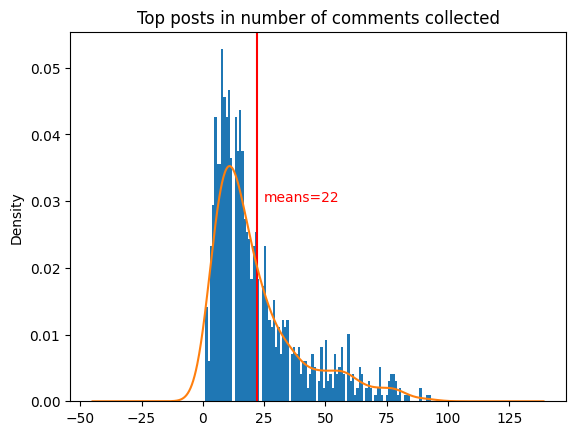

In [183]:
ax = df["post_id"].value_counts().plot(kind = "hist", 
                                       title = "Top posts in number of comments collected",
                                       bins = 100,
                                       density = True
                                               )
mean = df["post_id"].value_counts().mean()
plt.pyplot.axvline(mean, color = "red")
plt.pyplot.text(25, 0.03, "means=" + str(round(mean)), color = "red")
ax = df["post_id"].value_counts().plot(kind = 'kde')

We've got on average 22 comments per post we fetched. That's actually pretty good since we set a 100 comment limit on our scrapping, which means we have all comments of most posts. Let's see quantile range.

In [12]:
df["post_id"].value_counts().quantile([.1, .25, .5, .75, .9])

0.10     5.0
0.25     9.0
0.50    16.0
0.75    29.0
0.90    50.0
Name: post_id, dtype: float64

Text(100, 60, 'mean=82')

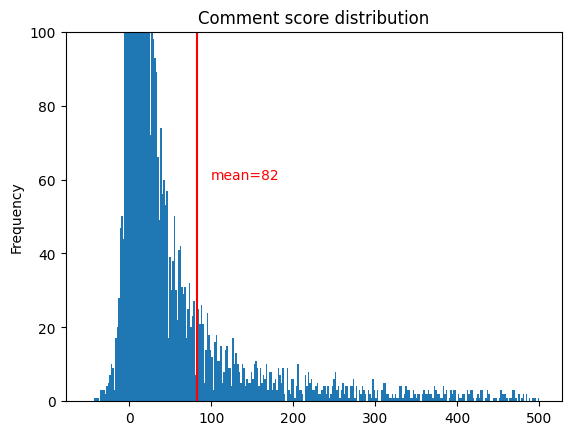

In [166]:
ax = df["comment_score"].plot(kind = "hist",
                         title = "Comment score distribution",
                         range = [-50, 500],
                         bins = 300,
                         ylim = [0, 100]
                        )
mean = df["comment_score"].mean()
plt.pyplot.axvline(mean, color = "red")
plt.pyplot.text(100, 60, "mean=" + str(round(mean)), color = "red")

High mean of comment score can be explained because we're getting posts from /top and then we sort comments by /top in addition to that. Which mean we should have quality comments to work with

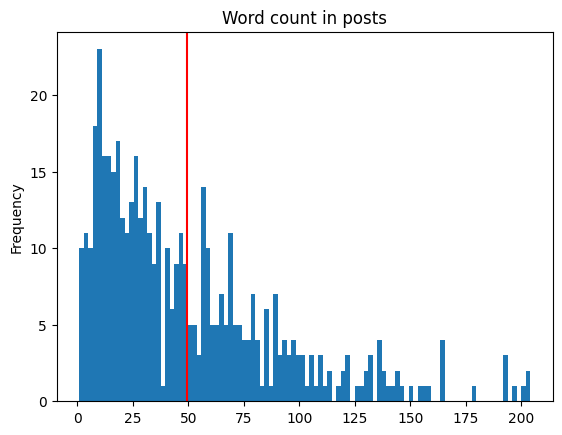

In [51]:
df["post_content"].str.split(" ").apply(len).value_counts().plot(kind = "hist", 
                                                                 title = "Word count in posts",
                                                                 bins = 100,
                                                                )
mean = df["post_content"].str.split(" ").apply(len).value_counts().mean()
plt.pyplot.axvline(mean, color = "red")

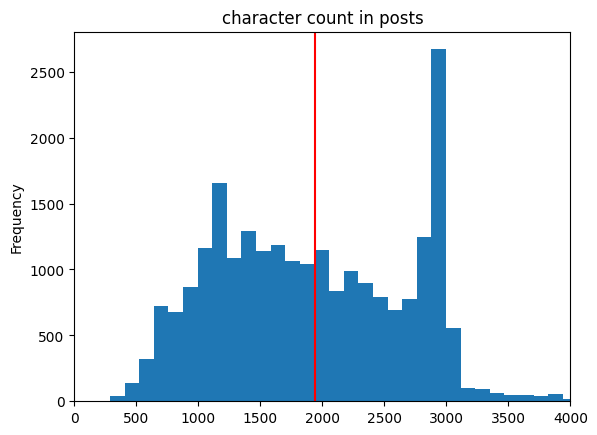

In [53]:
df["post_content"].str.len().plot(kind = "hist", 
                                  title = "character count in posts",
                                  bins = 100,
                                  xlim = [0, 4000]
                                 )
mean = df["post_content"].str.len().mean()
plt.pyplot.axvline(mean, color = "red")


### 5. Let's start checking out what's inside the comments and figure out what people think

In [109]:
df_sample = df[df['post_id'] == "10uxee0"]

d = dict({"YTA": len(df_sample[df_sample['comment_content'].str.contains(r'YTA')]),
          "YWBTA": len(df_sample[df_sample['comment_content'].str.contains(r'YWBTA')]), 
          "NTA": len(df_sample[df_sample['comment_content'].str.contains(r'NTA')]), 
          "YWNBTA": len(df_sample[df_sample['comment_content'].str.contains(r'YWNBTA')]), 
          "ESH": len(df_sample[df_sample['comment_content'].str.contains(r'ESH')]), 
          "NAH": len(df_sample[df_sample['comment_content'].str.contains(r'NAH')]), 
          "INFO":len(df_sample[df_sample['comment_content'].str.contains(r'INFO')]) })

for verdict in sorted(d, key=d.get, reverse=True):
    print(verdict, d[verdict])

NTA 31
YTA 0
YWBTA 0
YWNBTA 0
ESH 0
NAH 0
INFO 0


Let's do this for all our posts

In [110]:
categories = ["NTA", "YWBTA", "YWNBTA", "ESH", "NAH", "INFO", "YTA"]
mega_dict = count_occurrences(df, categories)

In [111]:
print(mega_dict)

{'10uxee0': {'NTA': 31, 'YWBTA': 0, 'YWNBTA': 0, 'ESH': 0, 'NAH': 0, 'INFO': 0, 'YTA': 0}, '10ur722': {'NTA': 14, 'YWBTA': 0, 'YWNBTA': 0, 'ESH': 0, 'NAH': 0, 'INFO': 0, 'YTA': 0}, '10upxdd': {'NTA': 27, 'YWBTA': 0, 'YWNBTA': 0, 'ESH': 0, 'NAH': 0, 'INFO': 0, 'YTA': 0}, '10v2vra': {'NTA': 63, 'INFO': 1, 'YWBTA': 0, 'YWNBTA': 0, 'ESH': 0, 'NAH': 0, 'YTA': 0}, '10ung90': {'NTA': 17, 'ESH': 3, 'YWBTA': 0, 'YWNBTA': 0, 'NAH': 0, 'INFO': 0, 'YTA': 0}, '10uj4d9': {'NTA': 12, 'INFO': 1, 'YWBTA': 0, 'YWNBTA': 0, 'ESH': 0, 'NAH': 0, 'YTA': 0}, '10ura66': {'NTA': 21, 'INFO': 3, 'YTA': 1, 'ESH': 1, 'YWBTA': 0, 'YWNBTA': 0, 'NAH': 0}, '10ux79o': {'YTA': 23, 'ESH': 3, 'NAH': 1, 'NTA': 0, 'YWBTA': 0, 'YWNBTA': 0, 'INFO': 0}, '10uhg3s': {'NTA': 19, 'YWBTA': 0, 'YWNBTA': 0, 'ESH': 0, 'NAH': 0, 'INFO': 0, 'YTA': 0}, '10v0goc': {'YTA': 63, 'INFO': 4, 'ESH': 1, 'NTA': 0, 'YWBTA': 0, 'YWNBTA': 0, 'NAH': 0}, '10utyes': {'YTA': 37, 'NTA': 2, 'INFO': 1, 'YWNBTA': 1, 'YWBTA': 0, 'ESH': 0, 'NAH': 0}, '10ulsrp'

Let's check the distribution of our results

In [117]:
result = count_first_keys(mega_dict, categories)
print(sorted(result.items(), key=lambda x:x[1], reverse=True))

[('NTA', 832), ('YTA', 176), ('ESH', 28), ('NAH', 14), ('YWBTA', 10), ('INFO', 10), ('YWNBTA', 1)]


let's do it for the entire thing 

In [140]:
full_d = dict({"YTA": len(df[df['comment_content'].str.contains(r'YTA')]),
          "YWBTA": len(df[df['comment_content'].str.contains(r'YWBTA')]), 
          "NTA": len(df[df['comment_content'].str.contains(r'NTA')]), 
          "YWNBTA": len(df[df['comment_content'].str.contains(r'YWNBTA')]), 
          "ESH": len(df[df['comment_content'].str.contains(r'ESH')]), 
          "NAH": len(df[df['comment_content'].str.contains(r'NAH')]), 
          "INFO":len(df[df['comment_content'].str.contains(r'INFO')]) })

sorted_full = sorted(full_d.items(), key=lambda x:x[1], reverse=True)
sorted_full_percent = {key: round(value/sum(value for _, value in sorted_full)*100) for key, value in sorted_full}

print(sorted_full)


[('NTA', 13606), ('YTA', 3375), ('ESH', 709), ('NAH', 659), ('INFO', 540), ('YWBTA', 185), ('YWNBTA', 84)]


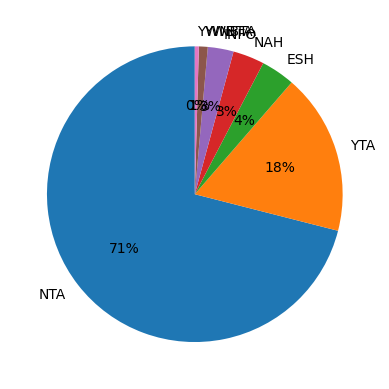

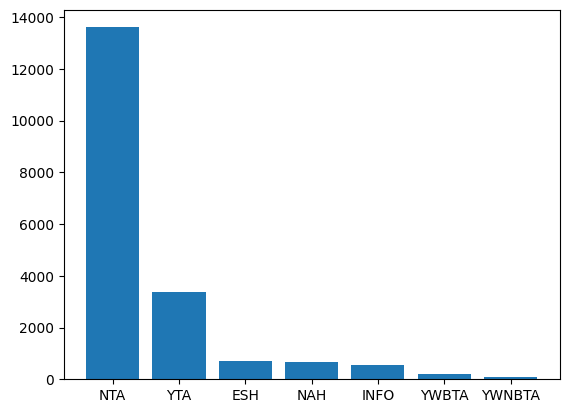

In [181]:
labels = [item[0] for item in sorted_full]
sizes = [item[1] for item in sorted_full]

fig1, ax1 = plt.pyplot.subplots()
ax1.pie(sizes, labels=labels, autopct='%.0f%%', startangle=90)

fig2, ax2 = plt.pyplot.subplots()
ax2.bar(labels, sizes)

plt.pyplot.show()


# SOMETHING IS FISHYYYY

In conclusion, why such a difference between YTA vs NTA results ? 
- People who post paint a positive picture of their situation thus are often judged NTA
- Sample is not representative: posters and judges are reddit users. Mostly young people posting and judged by their peers. 
    -> Like-minded people think the same.
- When you're thoughtful enough to be wondering if you're in the wrong, to the point of writing it down and posting it, chances are you might not be that much of an asshole.


Results seem to match this guy's data https://www.reddit.com/r/dataisbeautiful/comments/tr4aru/oc_ramitheasshole_asshole_percentage_by_age_and/
This also shows their is a clear bias against men and women over 40. 

If an AI model were to rank assholery based on this learning data, it will probably show: 
- the same bias over gender and age
- the same global distribution of 70% NTA 20% YTA 